In [1]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
# 아이리스 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
iris.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 2개의 주성분으로 차원 축소
X_pca = pca.fit_transform(X_scaled)

# 주성분 점수 DataFrame 생성
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y


In [7]:
unit_vectors = pca.transform(np.eye(4))
unit_vector_dict = {
    key : val
    for key, val in zip(iris.feature_names,unit_vectors)
}

In [8]:
unit_vector_dict

{'sepal length (cm)': array([0.52106591, 0.37741762]),
 'sepal width (cm)': array([-0.26934744,  0.92329566]),
 'petal length (cm)': array([0.5804131 , 0.02449161]),
 'petal width (cm)': array([0.56485654, 0.06694199])}

시각화

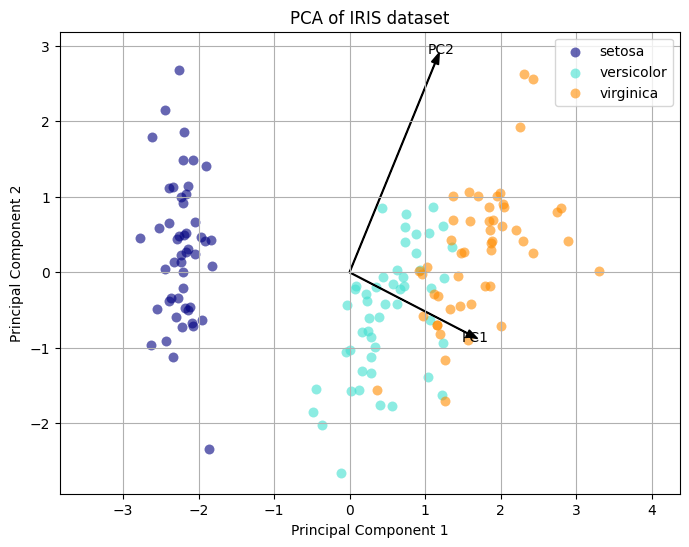

In [9]:
# 색상 지정
colors = ['navy', 'turquoise', 'darkorange']

# 주성분 분석 결과 시각화
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PC1'], pca_df.loc[pca_df['target'] == i, 'PC2'],
                color=color,s=50,label=target_name,alpha=0.6,lw=0.05)

## 포인트 레이블 추가 (옵션)
#for i, point in pca_df.iterrows():
#    plt.text(point['PC1'], point['PC2'], str(point['target']))

# Add arrows to show the principal components


pad_val =[(0.2,0.18),
          (0,0.15),
          (0.91,0.007),
          (0.83,0.07)]
pad = {key:val for key,val in zip(iris.feature_names,pad_val)}

mean_vec = np.mean(X_scaled, axis=0)
for i, v in enumerate(pca.components_):
    plt.arrow(mean_vec[0], mean_vec[1], v[0]*3, v[1]*3, color='black', width=0.01, head_width=0.1)
    plt.text(v[0]*3.2, v[1]*3.2, f"PC{i+1}", color='black', ha='center', va='center')


plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis('equal')  # x축과 y축의 스케일을 동일하게
plt.grid(True)
plt.show()


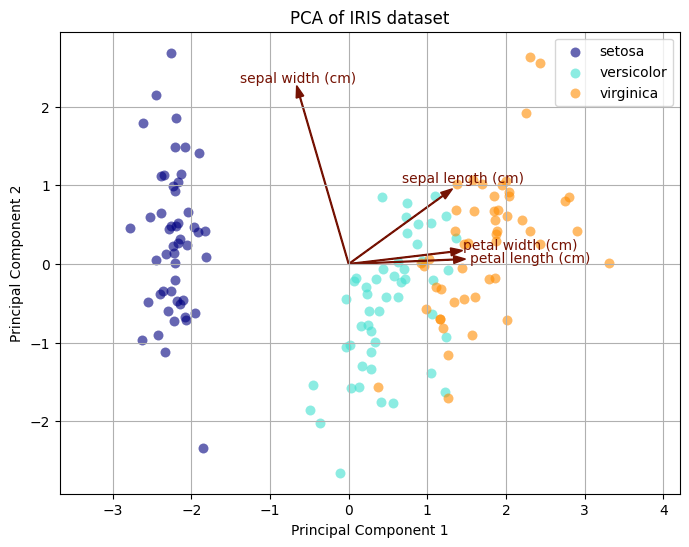

In [10]:
# 색상 지정
colors = ['navy', 'turquoise', 'darkorange']

# 주성분 분석 결과 시각화
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PC1'], pca_df.loc[pca_df['target'] == i, 'PC2'],
                color=color,s=50,label=target_name,alpha=0.6,lw=0.05)

## 포인트 레이블 추가 (옵션)
#for i, point in pca_df.iterrows():
#    plt.text(point['PC1'], point['PC2'], str(point['target']))

# Add arrows to show the principal components


pad_val =[(0.2,0.18),
          (0,0.15),
          (0.91,0.007),
          (0.83,0.07)]
pad = {key:val for key,val in zip(iris.feature_names,pad_val)}

mean_vec = np.mean(X_scaled, axis=0)
#for i, v in enumerate(pca.components_):
#    plt.arrow(mean_vec[0], mean_vec[1], v[0]*3, v[1]*3, color='black', width=0.01, head_width=0.1)
#    plt.text(v[0]*3.2, v[1]*3.2, f"PC{i+1}", color='black', ha='center', va='center')
for key, val in unit_vector_dict.items():
    plt.arrow(mean_vec[0], mean_vec[1], val[0]*2.3, val[1]*2.3, color='#751203', width=0.01, head_width=0.1)
    plt.text(val[0]*2.4+pad[key][0], val[1]*2.4+pad[key][1], key, color='#751203', ha='center', va='center')


plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis('equal')  # x축과 y축의 스케일을 동일하게
plt.grid(True)
plt.show()


In [11]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [12]:
pca.transform(pca.components_)

array([[1.00000000e+00, 2.60232517e-15],
       [2.29914269e-15, 1.00000000e+00]])

In [13]:
df_scaled = pd.DataFrame(data=X_scaled,columns=iris.feature_names)
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<AxesSubplot: >

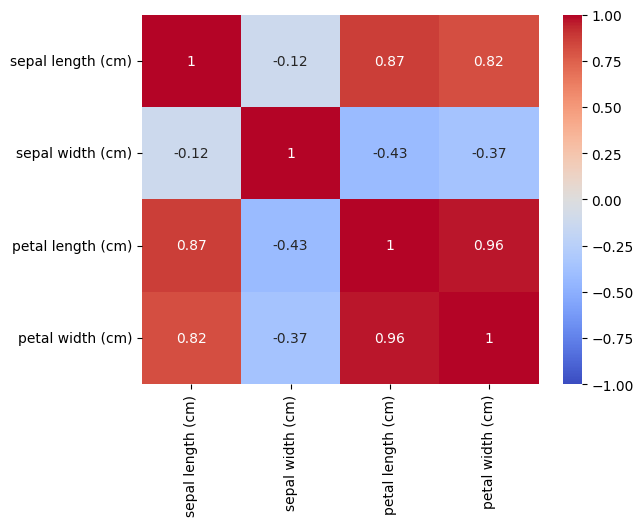

In [14]:
import seaborn as sns

fig,ax = plt.subplots()
sns.heatmap(df_scaled.corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_scaled,y)

display(list(zip(iris.feature_names,model.feature_importances_)))
display(np.sum(model.predict(X_scaled) == y)/len(y) * 100)

[('sepal length (cm)', 0.01351351351351351),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.5581648224311269),
 ('petal width (cm)', 0.42832166405535965)]

99.33333333333333

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

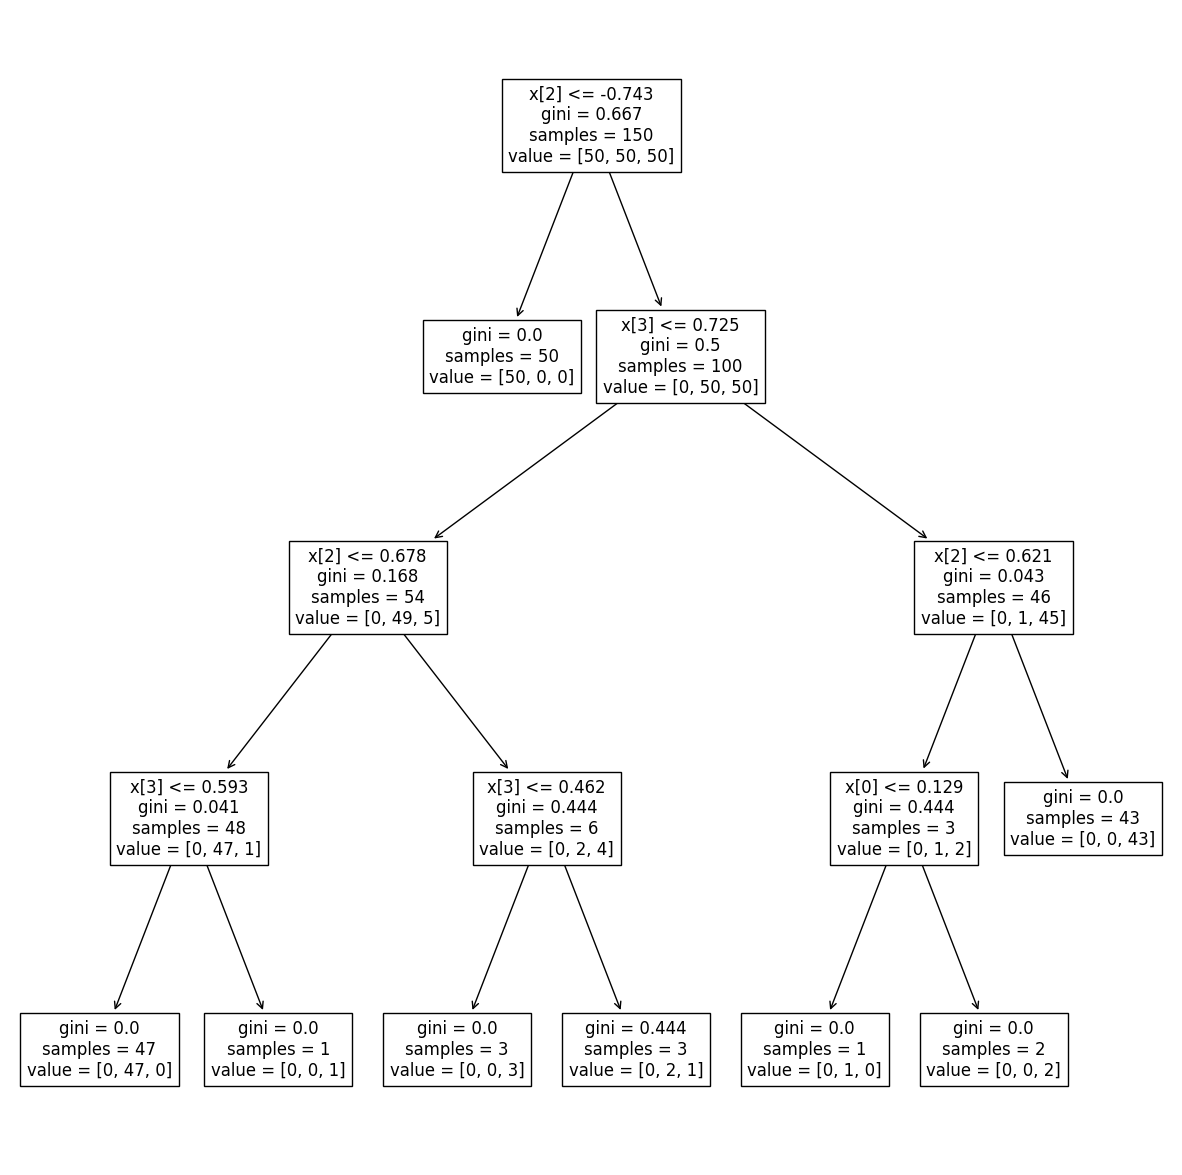

In [17]:
fig,ax = plt.subplots(figsize=(15,15))
plot_tree(model);

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_pca = DecisionTreeClassifier(max_depth=4)
model_pca.fit(X_pca,y)

print(model_pca.feature_importances_)
display(np.sum(model_pca.predict(X_pca) == y)/len(y) * 100)

[0.99789584 0.00210416]


98.0

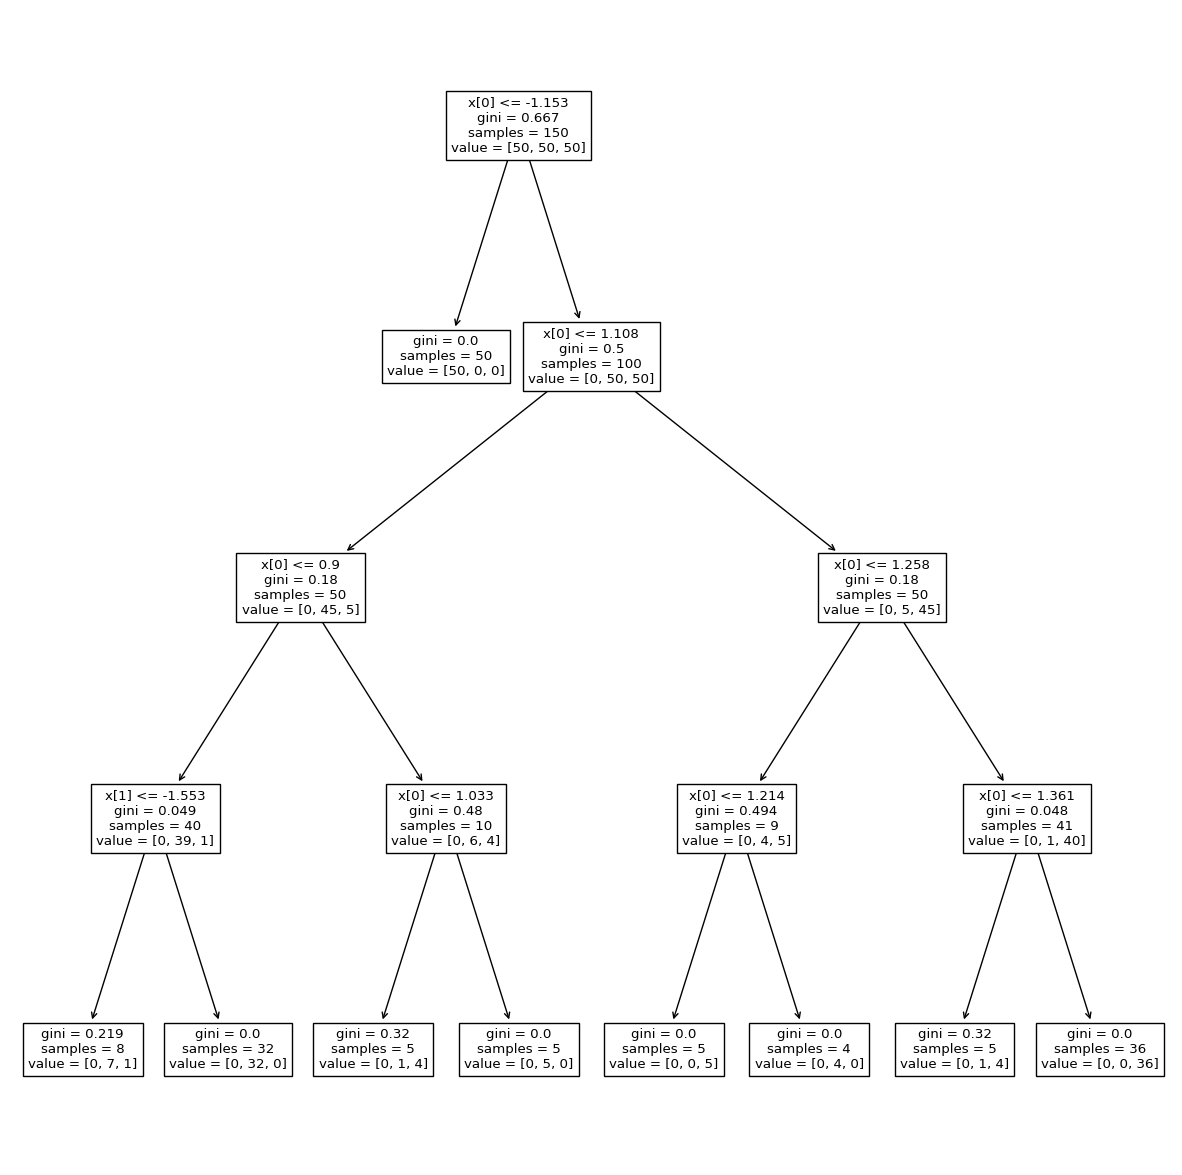

In [19]:
fig,ax = plt.subplots(figsize=(15,15))
plot_tree(model_pca);